In [3]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 가우시안 정규분포 나이브 베이즈 모형

In [4]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)

In [10]:
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

In [ ]:
# 연습문제 1 : 붓꽃 분류 문제를 가우시안 나이브 베이즈 모형을 사용하여 풀고 다음을 구하라.
# confusion matrix, classification report

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [15]:
X = df.iloc[:, :4]
y = df.iloc[:, 4:]

In [16]:
model_norm = GaussianNB().fit(X, y)
print(model_norm.classes_)
print(model_norm.class_count_)
print(model_norm.class_prior_)

['setosa' 'versicolor' 'virginica']
[50. 50. 50.]
[0.33333333 0.33333333 0.33333333]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print(model_norm.theta_[0], model_norm.sigma_[0])
print(model_norm.theta_[1], model_norm.sigma_[1])
print(model_norm.theta_[2], model_norm.sigma_[2])

[5.006 3.418 1.464 0.244] [0.121764 0.142276 0.029504 0.011264]
[5.936 2.77  4.26  1.326] [0.261104 0.0965   0.2164   0.038324]
[6.588 2.974 5.552 2.026] [0.396256 0.101924 0.298496 0.073924]


In [21]:
x_new = iris.data

In [23]:
y_pred = model_norm.predict_proba(x_new)

In [ ]:
y_true = model

In [ ]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

In [ ]:
# 연습문제 2 : MNIST Digit 분류 문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 
# 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브 베이즈 모형을 적용한다.

In [30]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=8)

In [47]:
from sklearn.datasets import load_digits
X = load_digits().data
y = load_digits().target

In [48]:
binarizer.fit_transform(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [49]:
from sklearn.naive_bayes import BernoulliNB

In [50]:
model_bern = BernoulliNB().fit(X, y)

In [56]:
y_pred = model_bern.predict(X)
y_true = y

In [63]:
print(confusion_matrix(y_true, y_pred))
print("-" * 50)
print(classification_report(y_true, y_pred))

[[175   1   0   0   2   0   0   0   0   0]
 [  0 112  21   0   3   1   1   1  32  11]
 [  0   6 153   6   0   0   0   1  11   0]
 [  1   1   3 157   0   2   0   3   7   9]
 [  0   1   0   0 172   0   0   7   1   0]
 [  2   3   0   2   1 149   2   0   3  20]
 [  0   5   0   0   2   2 171   0   1   0]
 [  0   0   0   0   3   0   0 175   1   0]
 [  0  13   1   4   0   3   2   2 142   7]
 [  0   6   0   3   7   3   0   9   6 146]]
--------------------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       178
          1       0.76      0.62      0.68       182
          2       0.86      0.86      0.86       177
          3       0.91      0.86      0.88       183
          4       0.91      0.95      0.93       181
          5       0.93      0.82      0.87       182
          6       0.97      0.94      0.96       181
          7       0.88      0.98      0.93       179
          8       0.70      0.82      0.

In [80]:
theta = model_bern.feature_log_prob_
theta[0]

array([-5.19295685, -4.09434456, -0.11778304, -0.00557105, -0.0111733 ,
       -0.27297593, -3.2470467 , -5.19295685, -5.19295685, -1.04982212,
       -0.0111733 , -0.00557105, -0.0111733 , -0.00557105, -1.11541941,
       -5.19295685, -5.19295685, -0.16251893, -0.00557105, -0.21622311,
       -0.63907996, -0.0111733 , -0.22314355, -5.19295685, -5.19295685,
       -0.04546237, -0.00557105, -0.94446161, -2.55389952, -0.0111733 ,
       -0.02247286, -5.19295685, -5.19295685, -0.02247286, -0.00557105,
       -1.5293952 , -3.58351894, -0.00557105, -0.03390155, -5.19295685,
       -5.19295685, -0.11155249, -0.00557105, -0.86222351, -0.91629073,
       -0.00557105, -0.10536052, -5.19295685, -5.19295685, -1.00330211,
       -0.00557105, -0.00557105, -0.02817088, -0.00557105, -0.49247649,
       -5.19295685, -5.19295685, -4.49980967, -0.08701138, -0.00557105,
       -0.00557105, -0.10536052, -2.01490302, -5.19295685])

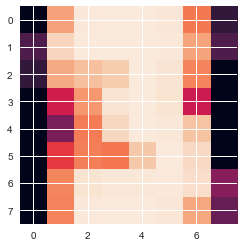

In [85]:
plt.imshow(theta[3].reshape(8, 8))

In [ ]:
# 연습문제 3

In [86]:
from sklearn.datasets import load_digits
X = load_digits().data
y = load_digits().target

In [87]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X, y)

In [88]:
y_pred = model.predict(X)
y_true = y

In [89]:
print(confusion_matrix(y_true, y_pred))
print("-" * 50)
print(classification_report(y_true, y_pred))

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]
--------------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       178
          1       0.87      0.75      0.81       182
          2       0.90      0.90      0.90       177
          3       0.99      0.87      0.93       183
          4       0.96      0.96      0.96       181
          5       0.97      0.86      0.91       182
          6       0.98      0.97      0.98       181
          7       0.89      0.99      0.94       179
          8       0.78      0.89      0.

In [90]:
theta = model.feature_log_prob_
theta[0]

array([-10.94162417,  -9.33218625,  -4.32689857,  -3.18714262,
        -3.33473964,  -4.68395658,  -8.99571402, -10.94162417,
       -10.94162417,  -5.87271996,  -3.22739302,  -3.16634832,
        -3.31749358,  -3.32780548,  -5.78833257, -10.94162417,
       -10.94162417,  -4.44183713,  -3.10091771,  -4.09787422,
        -5.01469814,  -3.26052517,  -4.499084  , -10.94162417,
       -10.94162417,  -4.09255788,  -3.21673573,  -5.06669344,
        -7.68352763,  -3.55515332,  -3.89497689, -10.94162417,
       -10.94162417,  -3.98889552,  -3.31213425,  -5.86645035,
        -8.74439959,  -3.58726184,  -3.7956397 , -10.94162417,
       -10.94162417,  -4.50707765,  -3.17266812,  -5.25464881,
        -5.32849606,  -3.33374609,  -3.99176771, -10.94162417,
       -10.94162417,  -5.97877954,  -3.19014885,  -3.460632  ,
        -3.42247421,  -3.17520727,  -4.87551608, -10.94162417,
       -10.94162417, -10.24847699,  -4.33362354,  -3.1521696 ,
        -3.16971391,  -4.06535955,  -7.02960116, -10.94

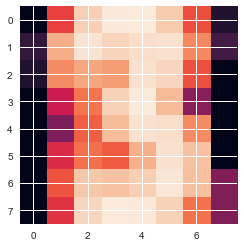

In [91]:
plt.imshow(theta[3].reshape(8, 8))